In [18]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as sk
from Functions import image_processing as ip
from Functions import seeded_region_growing as srg
from Functions import unseeded_region_growing as urg
from Functions import seed_detection as sd
from Functions import region_merging as rm
from Functions import dice_score as ds
from Functions import segmentation as seg
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


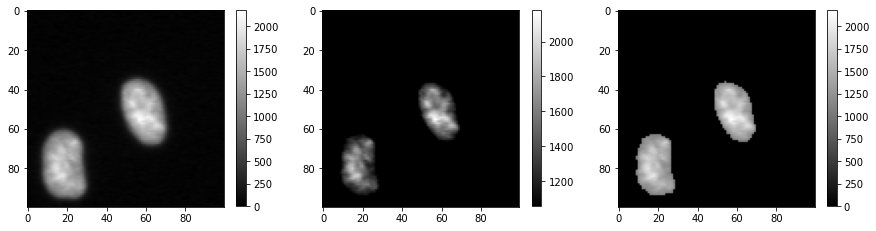

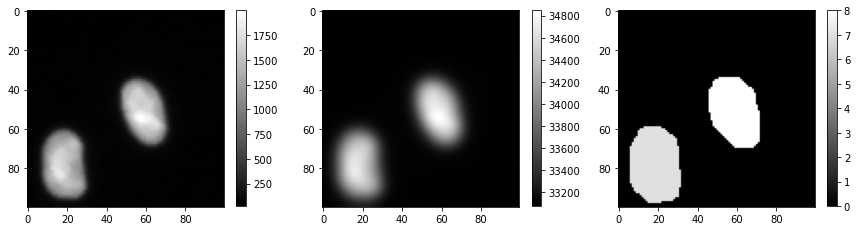

In [12]:
image_hela33_small = sk.imread("../Data/N2DL-HeLa/img/t13.tif")[100:200, 450:550]
image_hela33_small_n = ip.subtract_minimum(image_hela33_small.copy())
image_gt_hela33_small = sk.imread("../Data/N2DL-HeLa/gt/man_seg13.tif")[100:200, 450:550]

image_hela33_clipped = ip.image_clipping(image_hela33_small_n,0.03*np.amax(image_hela33_small),0.1*np.amax(image_hela33_small))
image_hela33_clipped_extreme = ip.image_clipping_extreme(image_hela33_small_n, 0.03*np.amax(image_hela33_small), 0.1*np.amax(image_hela33_small))
image_hela33_median = ip.median_filter(image_hela33_small_n, 5)
image_hela33_gauss = ip.gaussian_filter(image_hela33_small, 3)
ip.show_three_images_colorbar(image_hela33_small_n, image_hela33_clipped, image_hela33_clipped_extreme, 0.45)
ip.show_three_images_colorbar(image_hela33_median, image_hela33_gauss, image_gt_hela33_small, 0.45)

5000
32
4
unweighted dice score: 0.9783, weighted dice score: 0.9574626564759214
5000
17
4
unweighted dice score: 0.9245, weighted dice score: 0.8252057114624145
5000
17
4
unweighted dice score: 0.9352, weighted dice score: 0.855341320814107
5000
30
6
unweighted dice score: 0.9778, weighted dice score: 0.9564227250071373
5000
26
4
unweighted dice score: 0.9805, weighted dice score: 0.9620042067773155


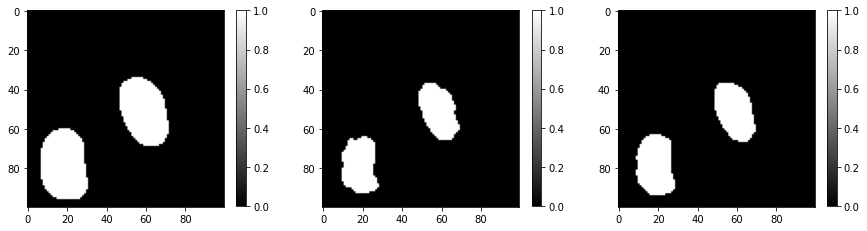

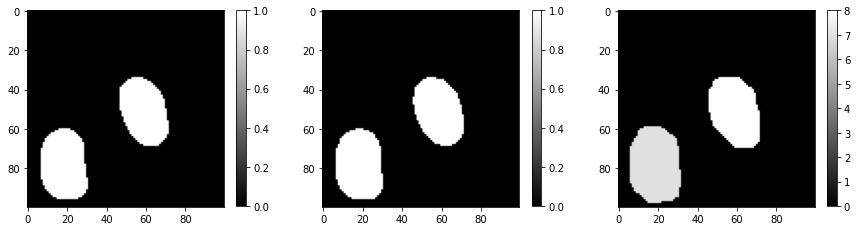

In [13]:
image_small_segmented_urg = seg.unseeded_segmentation(image_hela33_small, image_gt_hela33_small.copy(), (0,0), 50, 0.01, 300)
image_clipped_segmented_urg = seg.unseeded_segmentation(image_hela33_clipped, image_gt_hela33_small.copy(), (0,0), 50, 0.1, 300)
image_clipped_extreme_segmented_urg = seg.unseeded_segmentation(image_hela33_clipped_extreme, image_gt_hela33_small.copy(), (0,0), 50, 0.1, 300)
image_median_segmented_urg = seg.unseeded_segmentation(image_hela33_median, image_gt_hela33_small.copy(), (0,0), 50, 0.1, 300)
image_gauss_segmented_urg = seg.unseeded_segmentation(image_hela33_gauss, image_gt_hela33_small.copy(), (0,0), 50, 0.01, 300)
ip.show_three_images_colorbar(image_small_segmented_urg, image_clipped_segmented_urg, image_clipped_extreme_segmented_urg, 0.45)
ip.show_three_images_colorbar(image_median_segmented_urg,image_gauss_segmented_urg, image_gt_hela33_small, 0.45)

5000
26
4
unweighted dice score: 0.9805, weighted dice score: 0.9620042067773155


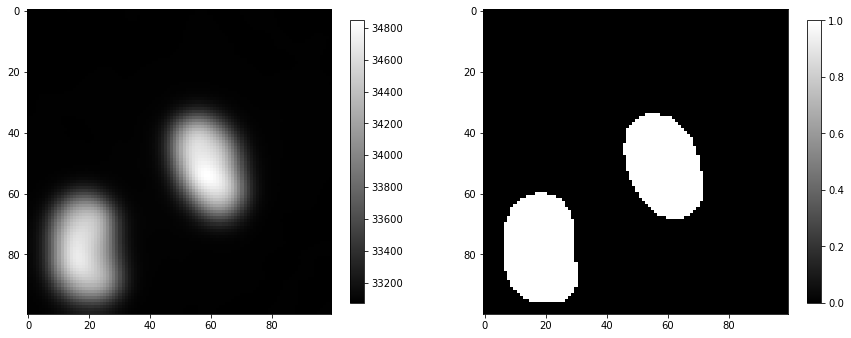

In [10]:
image_hela33_small = sk.imread("../Data/N2DL-HeLa/img/t13.tif")[100:200, 450:550]
image_gt_hela33_small = sk.imread("../Data/N2DL-HeLa/gt/man_seg13.tif")[100:200, 450:550]
image_hela33_gauss = ip.gaussian_filter(image_hela33_small, 3)
image_gauss_segmented_urg = seg.unseeded_segmentation(image_hela33_gauss.copy(), image_gt_hela33_small, (0,0), 50, 0.01, 300)
ip.show_two_images_colorbar(image_hela33_gauss, image_gauss_segmented_urg, 0.65)

FileNotFoundError: [Errno 2] No such file or directory: 'Result_Pictures/Seeded_Region_Growing/bar_preprocessing_srg.png'

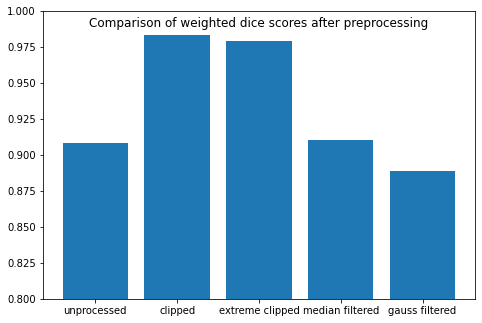

In [31]:
fig = plt.figure()
fig.suptitle("Comparison of weighted dice scores after preprocessing", fontsize = 12)
langs = ['unprocessed', 'clipped', 'extreme clipped', 'median filtered', 'gauss filtered']

ax = fig.add_axes([0,0,1,1])
weighted_ds = [0.908,0.983,0.979,0.910,0.889]
ax.bar(langs,weighted_ds)
plt.ylim(0.8, 1)
unweighted_ds = [0.956, 0.991, 0.989, 0.957, 0.948]

#plt.show()


plt.savefig("Result_Pictures/Seeded_Region_Growing/bar_preprocessing_srg")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

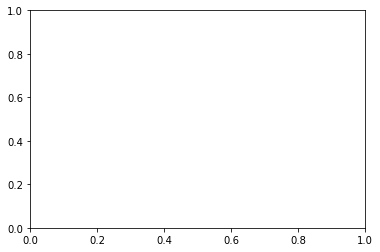

In [21]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(zip(x*3, ["y"]*3+["z"]*3+["k"]*3, y+z+k), columns=["time", "kind", "data"])
plt.figure(figsize=(10, 6))
sns.barplot(x="time", hue="kind", y="data", data=df)
plt.show()

In [ ]:
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

ds_weighted= [0.908,0.983,0.979,0.910,0.889]
rects1 = ax.bar(ind - width, ds_weighted, width, color='r')
ds_unweighted = [0.956, 0.991, 0.989, 0.957, 0.948]
rects2 = ax.bar(ind+width, ds_unweighted, width, color='g')

ax.set_ylabel('Dice Score')
ax.set_xticks(ind+width)
ax.set_xticklabels(('unprocessed', 'clipped', 'extreme clipped', 'median filtered', 'gauss filtered'))
ax.legend( (rects1[0], rects2[0]), ('weighted', 'unweighted') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()